In [9]:
import os
from os import listdir
from os.path import join
from PIL import Image
import numpy as np
import json
import torch
from Enet import ENet
import matplotlib.pyplot as plt

In [3]:
# load enet
seg_model_path = "/Users/karl/Documents/Notebooks/RobotRL/segmodel/seg_model2.0"
enet = ENet(2)
enet.eval()
enet.load_state_dict(torch.load(seg_model_path, map_location='cpu'))

In [5]:
# extract all images
images = []
direc_path = join(os.getcwd(), "Record_8.19_semantic")
files = [join(direc_path, f) for f in listdir(direc_path) if "0" in f]
files = sorted(files, key=lambda f:int(f.split("/")[-1].replace(".txt","")))
for file in files:
    print(file)
    with open(file,"r") as f:
        imgs = json.load(f)['img']
        for k,v in imgs.items():
            img = Image.fromarray(np.asarray(v).astype(np.uint8))
            img.save(join(direc_path+"/images", k+".png"),"PNG")


/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/50.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/100.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/150.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/200.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/250.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/300.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/350.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/400.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/450.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/500.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/550.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/600.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/650.txt
/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/700.txt
/Users/karl/Documents/Notebooks/Rob

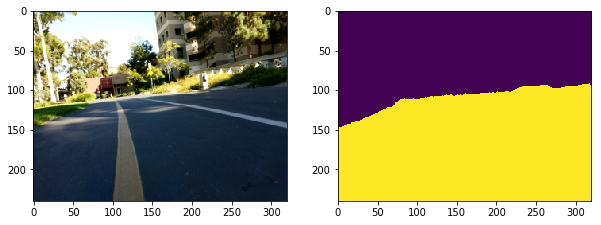

In [44]:
img_path = "/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/images/1630.png"
img_path= "/Users/karl/Documents/Notebooks/RobotRL/Record_8.19_semantic/images/1076.png"
img = Image.open(img_path)
inputs = torch.from_numpy(np.transpose(img, (2,0,1))).unsqueeze(0).float()/255
outputs = (enet(inputs).squeeze().argmax(0)*255).numpy().astype(np.uint8)
fig=plt.figure(figsize = (10,10))
columns = 2
rows = 1
fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(outputs)
plt.show()

In [46]:
outputs

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

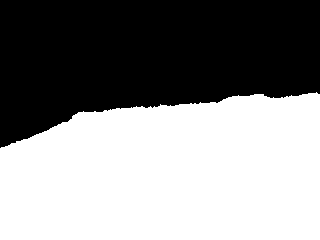

In [47]:
Image.fromarray(outputs)

In [7]:
outputs.shape

torch.Size([1, 2, 240, 320])

In [81]:
# road extraction images
# prepare input
direc_path = join(join(os.getcwd(), "Record_raw"), "images")
pics = [f for f in listdir(direc_path) if ("_enet" not in f and "png" in f)]
pics.sort(key=lambda r:abs(int(r.replace(".png",""))))
enet_input = []
for p in pics:
    img = np.asarray(Image.open(join(direc_path, p)))
    enet_input.append(img)

enet_input = torch.from_numpy(np.transpose(np.asarray(enet_input), (0,3,1,2))).float()/255

In [90]:
outputs_all = torch.FloatTensor()
a = torch.tensor((2,3)).float()
b = torch.cat([outputs_all,a], dim=0)

In [91]:
a

tensor([2., 3.])

In [92]:
b

tensor([2., 3.])

In [ ]:
outputs_all = torch.FloatTensor()
batch = 20
i = 0
j = min(batch, enet_input.shape[0])
while(i < enet_input.shape[0]):
    print(i)
    inputs = enet_input[i:j]
    outputs = enet(inputs)
    outputs_all = torch.cat([outputs_all, outputs], dim=0)
    i = i + batch
    j = min(i+batch, enet_input.shape[0])
    

0
20
40
60
80
100
120
140
160
180
200
220
240
260


In [73]:
images = enet_output.argmax(1)

In [74]:
images.shape

torch.Size([10, 240, 320])

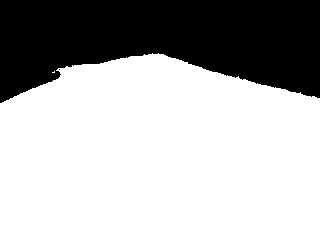

In [79]:
Image.fromarray(images[9].numpy().astype(np.uint8)*255)